# Mini projects

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Level 1

### Photo art app

1. Create a function that receives an image and converts it to a sketch so it looks similar to this:
![Example 1](img/sketch.png)

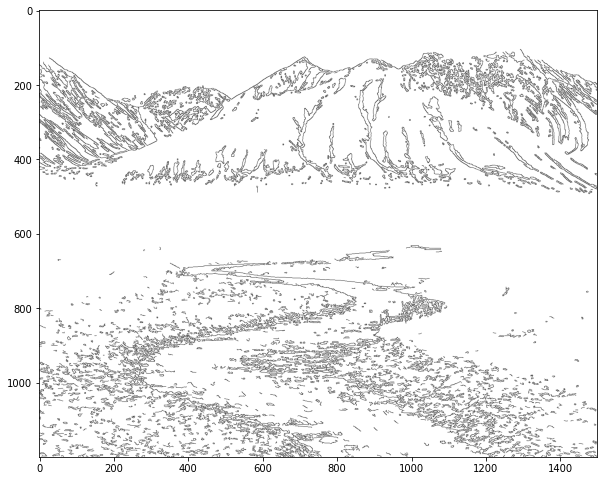

In [2]:
def sketching(imgpath):
    img = cv2.imread(imgpath)
    img_blur = cv2.GaussianBlur(img, (5,5), 0)
    sketch = cv2.Canny(img_blur, 100, 200)
    sketch_not = cv2.bitwise_not(sketch)

    plt.figure(figsize=(10,10))
    plt.imshow(sketch_not, cmap='gray')
    
sketching('./img/landscape.jpg')

### Instagram filters app

1. Create a function that given a photo it applies a black and white filter
1. Create a filter that will change color of the image 

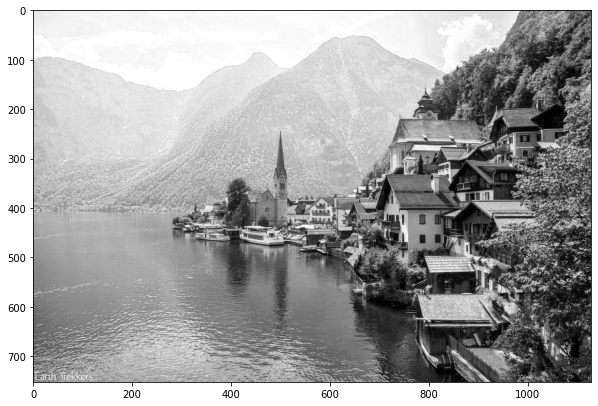

In [3]:
def bw_filter(imgpath):
    img = cv2.imread(imgpath)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    h, s, v = cv2.split(img_hsv)
    
    s1 = s - s
    
    bluish = cv2.merge([h, s1, v])
    img_gray = cv2.cvtColor(bluish, cv2.COLOR_HSV2BGR)
    
    plt.figure(figsize=(10,10))
    plt.imshow(img_gray)
    

bw_filter('./img/day1.jpg')

## Level 2

### Photo art app

1. Change the app so it can now do the same but using your webcam to make it in real time  
**Hint:** you can use ```cv2.VideoCapture(0)```

In [ ]:
def video_sketching():
    cap = cv2.VideoCapture(0)

    while(True): 
        ret, frame = cap.read()
        img = frame.copy()
        img_blur = cv2.GaussianBlur(img, (3,3), 0)
        sketch = cv2.Canny(img_blur, 50, 150)
        sketch_not = cv2.bitwise_not(sketch) 
  
        # displaying the video 
        cv2.imshow("Sketch", sketch_not) 

        # exiting the loop 
        key = cv2.waitKey(1) 
        if key == ord("q"): 
            break

    # closing the window 
    cv2.destroyAllWindows() 
    cap.release()
    
video_sketching()

In [6]:
def bw_video_1():
    cap = cv2.VideoCapture(0)

    while(True): 
        ret, frame = cap.read()
        img = frame.copy()
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
        h, s, v = cv2.split(img_hsv)
    
        s1 = s - s
    
        bluish = cv2.merge([h, s1, v])
        gray = cv2.cvtColor(bluish, cv2.COLOR_HSV2BGR) 
  
        # displaying the video 
        cv2.imshow("Live", gray) 

        # exiting the loop 
        key = cv2.waitKey(1) 
        if key == ord("q"): 
            break

    # closing the window 
    cv2.destroyAllWindows() 
    cap.release()
    
bw_video_1()

AttributeError: 'NoneType' object has no attribute 'copy'

In [5]:
def bw_video_2():
    # reading the video 
    cap = cv2.VideoCapture(0) 

    # running the loop 
    while True: 

        # extracting the frames 
        ret, frame = cap.read() 

        # converting to gray-scale 
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 

        # displaying the video 
        cv2.imshow("Live", gray) 

        # exiting the loop 
        key = cv2.waitKey(1) 
        if key == ord("q"): 
            break

    # closing the window 
    cv2.destroyAllWindows() 
    cap.release()
    
bw_video_2()

error: OpenCV(4.4.0) /tmp/pip-req-build-zeowd5_m/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


### Photo correction app

1. Create a funtion to clean *noise* from images
![Noisy image](img/n.png)

In [ ]:
def noise_cleaning(imgpath):
    img = cv2.imread(imgpath)

    gaussian_img = cv2.GaussianBlur(img, (5,5), 0)
    
    
    plt.figure(figsize=(10,10))
    plt.imshow((gaussian_img[:,:,::-1]))
    
noise_cleaning('./img/noisy.png')

### Instagram filters app

1. Create a function that applies a sepia filter to the image, for a BGR image apply this kernel:
        [0.272, 0.534, 0.131],
        [0.349, 0.686, 0.168],
        [0.393, 0.769, 0.189]
        
Get the BGR value of the pixel.
Calculate tr, tg and tb using the formula

tb = 0.272R + 0.534G + 0.131B
tg = 0.349R + 0.686G + 0.168B
tr = 0.393R + 0.769G + 0.189B

Take the integer value.

Set the new RGB value of the pixel as per the following condition:

If tb > 255 then b = 255 else b = tb
If tg > 255 then g = 255 else g = tg
If tr > 255 then r = 255 else r = tr


Example:

Consider a color pixel with the following values

A = 255

R = 100

G = 150

B = 200

Where A, R, G and B represents the Alpha, Red, Green and Blue value of the pixel.

Remember! ARGB will have an integer value in the range 0 to 255.

So, to convert the color pixel into sepia pixel we have to first calculate tr, tg and tb.

tr = 0.393(100) + 0.769(150) + 0.189(200)

tr = 192.45

tr = 192 (taking integer value)

Similarly,

tg = 0.349(100) + 0.686(150) + 0.168(200) = 171 (taking integer value)

and tb = 0.272(100) + 0.534(150) + 0.131(200) = 133 (taking integer value)

In [ ]:
def sepia_filter(imgpath):
    
    img = cv2.imread(imgpath)
    
    b, g, r = cv2.split(img)
    
    tb =  (0.272*r) + (0.534*g) + (0.131*b)
    tg = (0.349*r) + (0.686*g) + (0.168*b)
    tr = (0.393*r) + (0.769*g) + (0.189*b)
    
    tb, tg, tr = tb.astype('int'), tg.astype('int'), tr.astype('int')
    
    for i in range(len(tb)):
        for j in range(len(tb)):
            if tb[i][j] > 255:
                tb[i][j] = 255
    for i in range(len(tb)):
            for j in range(len(tb)):
                if tb[i][j] > 255:
                    tb[i][j] = 255
    for i in range(len(tb)):
            for j in range(len(tb)):
                if tb[i][j] > 255:
                    tb[i][j] = 255
    
    
    sepia_img = cv2.merge([tb, tg, tr])
    
    plt.figure(figsize=(10,10))
    plt.imshow((sepia_img[:,:,::-1]))

sepia_filter('./img/cat.jpg')

## Level 3

### Instagram filters app

1. Apply the sepia filter by using the cv2.transfor function
1. Create different filters from the sepia filter so it renders different images

In [ ]:
def sepia_kernel(imgpath):
    img = cv2.imread(imgpath)
    
    kernel = np.array([ [0.272, 0.534, 0.131],
                     [0.349, 0.686, 0.168],
                     [0.393, 0.769, 0.189] ])
    
    sepia = cv2.transform(img, kernel)
    
    plt.figure(figsize=(10,10))
    plt.imshow((sepia[:,:,::-1]))

sepia_kernel('./img/cat.jpg')

# More projects

## Handwriting recognition

1. Write a one digit number (from 0 to 9) on a paper and using your mobile phone take a picture of it
1. Crop the image manually and pass it to a a function that will process it so it looks like a char in the MNIST dataset, make sure it is the correct size as well
![4](img/4.png)

1. Pass it through a MNIST classifier and print the prediction on screen

1. Modify the image so now it also contains the predicted result on the image
1. Try it with all digits